## Problem Statement

### What are the key inquiries we aim to address using the dataset?
1. To support a university's goal to introduce new courses and training for final-year students, can we identify the most in-demand job positions and assess the competitive landscape surrounding these roles?
2. What work models are companies adopting, and what category of companies/job types are still embracing remote workers?
3. Is there a discernible relationship between a company's size and the number of job applications it receives?

## Data Preparation

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/drey/Data_Science_Tasks/linkdin_Job_data.csv")

In [3]:
#Enable previweing of all the rows and columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
#preview the dataset
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN


In [5]:
# shows the number of rows and columns in the data set
df.shape

(7927, 16)

## Data Cleaning

In [6]:
#Identify the columns with missing values
missing_values = df.isna().sum()
print(missing_values)

job_ID                   0
job                     33
location                33
company_id            7927
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
Column1               7927
dtype: int64


In [7]:
#Drop columns that are all Nan
#This is because the number of Nan values in columns 'column_id' and 'column_1' are equal to the number of rows in the dataset

df.drop(columns = ["company_id", "Column1"], inplace=True)

In [8]:
# Check for duplicates
df.duplicated().sum()

79

In [9]:
# remove duplicate rows
df.drop_duplicates(keep='first', inplace=True)
df

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...


In [10]:
# Identifying the data type of each column
df.dtypes

job_ID                 int64
job                   object
location              object
company_name          object
work_type             object
full_time_remote      object
no_of_employ          object
no_of_application     object
posted_day_ago        object
alumni                object
Hiring_person         object
linkedin_followers    object
hiring_person_link    object
job_details           object
dtype: object

In [11]:
#Data Cleaning Functions

# A function to view and count unique values in a column
def view_unique(dataframe, column_name, new_column_name="occurences"):
    return dataframe.groupby(column_name)[column_name].count().reset_index(name=new_column_name).sort_values(by=[column_name],ascending=[False])

# A function to extract numeric values from a string
def extract_num(dataframe, column_name):
    return dataframe[column_name].str.extract('(\d+)')

# A function to enforce proper capitalization on values in a column
def capitalizing(column_name):
    if df[column_name].empty == True:
        return np.nan                # fill empty values with nan
    else:
        return df[column_name].str.capitalize()



In [12]:
# Viewing the unique values in the applications column
view_unique(df,"no_of_application","occurrences")

# Identified 4238 instances of string values in the 'no_of_applications'column
# This constitutes about half of the dataset; hence, dropping/deleting the rows with string values would not be ideal.

,no_of_application,occurrences
201,seconds,3
200,minutes,231
199,minute,5
198,hours,2630
197,hour,247
...,...,...
4,102,8
3,101,4
2,100,3
1,10,59


In [13]:
# Force the numeric columns to have numeric values, and if it doesn't, it returns Nan

df["no_of_application"]= pd.to_numeric(df["no_of_application"], errors="coerce")

In [14]:
# Remove the string 'followers' from each value

df["linkedin_followers"] = df["linkedin_followers"].str.replace(r' followers', '').str.replace(',', '', regex=True)

In [15]:
view_unique(df, "linkedin_followers", "occurences")

,linkedin_followers,occurences
3934,WARWICKSHIRE,2
3933,Thiruvananthapuram Kerala,2
3932,Thane Maharashtra,1
3931,São Bernardo Do Campo Sp,1
3930,San Mateo CA,1
...,...,...
4,1000996,1
3,1000950,1
2,1000554,1
1,100,3


In [16]:
# Change linkedin_followers column to a numeric data type
# Do not drop all rows with string values
# Instead, force the numeric columns to have numeric values, and if it doesn't, it returns Nan

df["linkedin_followers"]= pd.to_numeric(df["linkedin_followers"], downcast="integer",errors="coerce")

In [17]:
view_unique(df,"linkedin_followers")

,linkedin_followers,occurences
3912,13136792.0,1
3911,11931368.0,1
3910,11930979.0,1
3909,11930968.0,1
3908,11930947.0,1
...,...,...
4,6.0,3
3,5.0,3
2,4.0,5
1,3.0,3


In [18]:
# Preview and observe patterns of the column
view_unique(df,"posted_day_ago","occurences")

,posted_day_ago,occurences
90,9 minutes,10
89,9 hours,347
88,8 minutes,9
87,8 hours,244
86,7 minutes,13
...,...,...
4,10 hours,433
3,1 week,9
2,1 minute,6
1,1 hour,373


In [19]:
# Store all posting times broken down by time value and units 

# Extract the numeric portion and create new column for it
df["posted_time_value"] = extract_num(df,"posted_day_ago")

# Extract the unit portion and create new column for it
df["posted_time_unit"] = df["posted_day_ago"].str.extract('([a-zA-Z]+)')

df.drop(columns=["posted_day_ago"], inplace = True)  # Delete the old column from dataframe


In [20]:
# Clean the alumni column by extracting the number from the string
df["alumni"] = extract_num(df,"alumni")

In [21]:
# Preview and observe patterns of the column
view_unique(df,"no_of_employ","occurrences")

# It shows that additional industry data is included in the column.

,no_of_employ,occurrences
268,51-200 employees · Wellness and Fitness Services,3
267,51-200 employees · Telecommunications,2
266,"51-200 employees · Technology, Information and...",98
265,51-200 employees · Staffing and Recruiting,44
264,51-200 employees · Spectator Sports,1
...,...,...
4,"1,001-5,000 employees · Biotechnology Research",1
3,"1,001-5,000 employees · Automation Machinery M...",1
2,"1,001-5,000 employees · Advertising Services",25
1,"1,001-5,000 employees · Accounting",3


In [22]:
# clean the number of employees column to identify the employee ranges
employee_range = df["no_of_employ"].str.replace(r' employees.*', '', regex=True).str.replace(',', '', regex=True)

# New columns for company size
df[["min_employees","max_employees"]] = employee_range.str.split('-', expand=True)

# Convert the min_employees and max_employees columns to numeric
df["min_employees"] = pd.to_numeric(df["min_employees"], errors='coerce')
df["max_employees"] = pd.to_numeric(df["max_employees"], errors='coerce')

#extract the industry from the employee column
split_employee = df["no_of_employ"].str.split(' employees .')

# Create a new column 'employer_industry' using np.where() to handle cases where industry is not included.
employer_industry = np.where(split_employee.str.len() > 1, split_employee.str[-1].str.strip(), np.nan)
df["employer_industry"] = employer_industry          #create a new column in the dataframe

df.drop(columns = ["no_of_employ"], inplace = True)  #drop the no_of_employ column

In [23]:
# standardize company name
df["company_name"] = capitalizing("company_name")

In [24]:
# Clean full_time_remote column

#Split job involvement and level into 2 columns
df[["job_time", "job_level"]] = df['full_time_remote'].str.split('·', expand=True)

df.drop(columns=["full_time_remote"], inplace = True) #delete the full_time_remote column

In [25]:
# Preview and observe patterns of the column
view_unique(df, "location")

# Clean the locations column to separate country, state, and city

df[["city", "state", "country"]] = df["location"].str.split(',', expand=True)  #new columns for each location category
df.head()

,job_ID,job,location,company_name,work_type,no_of_application,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,posted_time_value,posted_time_unit,min_employees,max_employees,employer_industry,job_time,job_level,city,state,country
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,200.0,12,NaN,5395547.0,NaN,About the job Crossover is the world's #1 sour...,8,hours,1001.0,5000.0,IT Services and IT Consulting,Full-time,Associate,Delhi,Delhi,India
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,184.0,12,NaN,5395547.0,NaN,About the job Crossover is the world's #1 sour...,8,hours,1001.0,5000.0,IT Services and IT Consulting,Full-time,Associate,New Delhi,Delhi,India
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,200.0,3,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,9,hours,1001.0,5000.0,IT Services and IT Consulting,Full-time,Mid-Senior level,Greater Bengaluru Area,None,None
3,3472816027,Data Analyst,"Gurugram, Haryana, India",Pvar services,On-site,200.0,NaN,Vartika Singh,2094.0,https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,7,hours,1.0,10.0,NaN,Full-time,None,Gurugram,Haryana,India
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline freight brokers,On-site,8.0,1,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,26,minutes,1.0,10.0,NaN,Full-time,None,Mohali district,Punjab,India


In [26]:
# Check on jobs that are posted multiple times.

duplicated_jobs = df.groupby(["job_ID"])["job_ID"].count().reset_index(name="new_column").sort_values(by=["new_column"],ascending=[False])
duplicated_jobs[duplicated_jobs["new_column"] > 1]

# Noticed 1520 job IDs are duplicates because these jobs are intentionally posted multiple times

,job_ID,new_column
2696,3471657636,6
2723,3471669068,6
102,3428103138,5
2697,3471658510,5
514,3463535172,5
...,...,...
4940,3476295844,2
5030,3476296807,2
1142,3466164212,2
1190,3466656298,2


In [27]:
# Clean 'Hiring_person' column

df["Hiring_person"] = df['Hiring_person'].str.replace(r'\(.*\)', '', regex=True)  # Remove text within parentheses
df["Hiring_person"] = capitalizing("Hiring_person")  # Standardize the text

In [28]:
# clean the job column to exclude miscellaneous information
view_unique(df, "job", "occurrences")

,job,occurrences
2990,Operation Engineer of Net-flow Platform,2
2989,|Ecommerce | Google Analytics| data analytics|...,1
2988,workday developer,1
2987,subject Matter Expert Trainer,1
2986,"strong in Linux ,BSP, Device Drivers , Camera ...",1
...,...,...
4,.NET Architect,1
3,(Senior) SAS Programmer,1
2,#Salesforce# Golang#Mongo DB# Python#Mainframe...,1
1,"#8301#1-Platform Engineer(Kubernetes , Azure A...",1


In [29]:
# Clean the job column to exclude strings within brackets, Yearly package data, all numbers, and special characters, etc

# Remove leading and trailing special characters
df['job'] = df['job'].str.extract(r'(\b[a-zA-Z\s]+)\b')

view_unique(df, "job", "occurrences")

,job,occurrences
2362,years exp Python developer,1
2361,workday developer,1
2360,subject Matter Expert Trainer,1
2359,strong in Linux,1
2358,ssrs,3
...,...,...
4,Developer,7
3,Core Engineer,3
2,Consultants,1
1,Business Analyst,2


## Exploratory Data Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7848 entries, 0 to 7926
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7848 non-null   int64  
 1   job                 7813 non-null   object 
 2   location            7815 non-null   object 
 3   company_name        7813 non-null   object 
 4   work_type           7660 non-null   object 
 5   no_of_application   3628 non-null   float64
 6   alumni              4826 non-null   object 
 7   Hiring_person       5660 non-null   object 
 8   linkedin_followers  4737 non-null   float64
 9   hiring_person_link  5660 non-null   object 
 10  job_details         7802 non-null   object 
 11  posted_time_value   7841 non-null   object 
 12  posted_time_unit    7841 non-null   object 
 13  min_employees       6236 non-null   float64
 14  max_employees       6236 non-null   float64
 15  employer_industry   4934 non-null   object 
 16  job_time   

##### Assessing the correlation between the quantitive variables in the dataset

In [31]:
# Select only the numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['job_ID'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

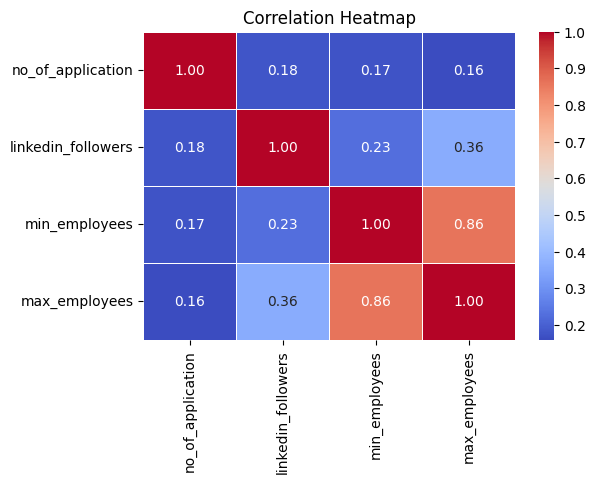

In [32]:
# # Display the correlation matrix in a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.7)
plt.title('Correlation Heatmap')
plt.show()

#### Analyze the distribution of quantitative data to view distribution and frequency. Also, to detect outliers and view summary statistics

<Axes: xlabel='linkedin_followers', ylabel='Count'>

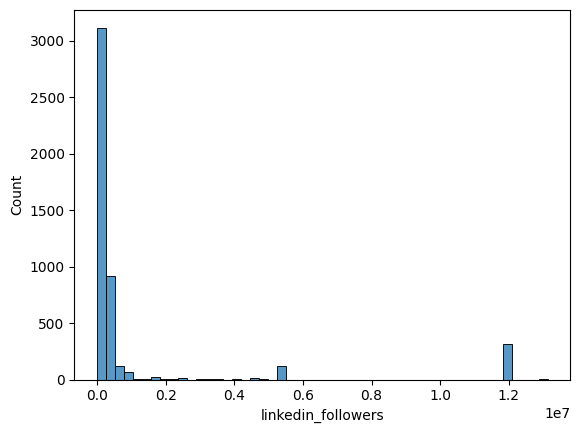

In [34]:
# The histogram shows that most of the hiring personnel have less than 1 million followers
sns.histplot(data=df, x="linkedin_followers", bins=50)


<Axes: xlabel='linkedin_followers'>

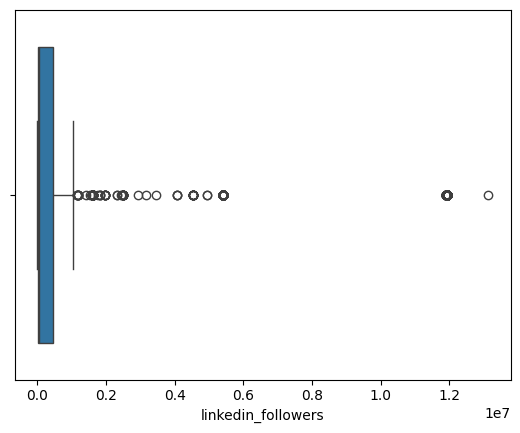

In [37]:
# Observed some outliers with 12 million+ LinkedIn followers
sns.boxplot(data=df, x="linkedin_followers")

<Axes: xlabel='no_of_application', ylabel='Count'>

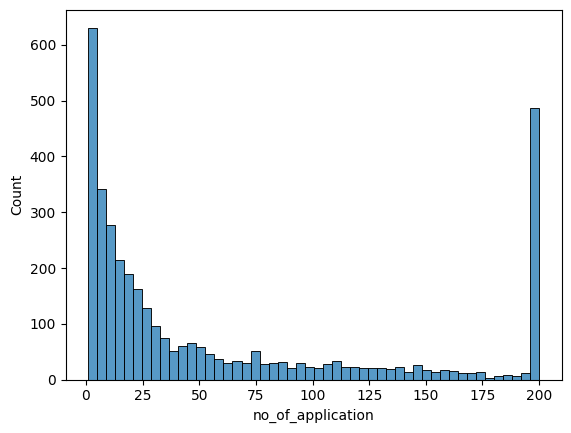

In [38]:
# The application data has a positive skewness 
# Indicating that the data is concentrated towards lower values, with relatively few high values.
# The mean of the application would be affected by the outliers contained in the extreme right of the histogram.

sns.histplot(x=df["no_of_application"], bins =50)

<Axes: xlabel='no_of_application'>

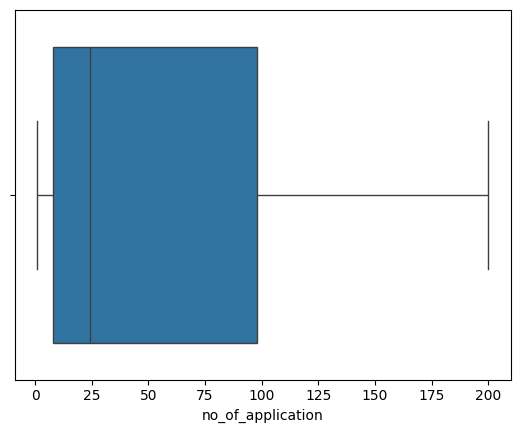

In [39]:
# The max amount of applications per job is 200 as indicated by the right whisker.
# The median is 25 applicatiosn as indicated by the middle line in the box blot.
sns.boxplot(data=df, x="no_of_application")

<Axes: xlabel='no_of_application', ylabel='work_type'>

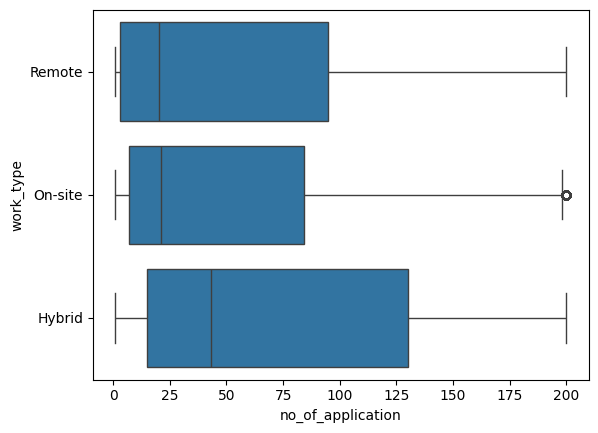

In [40]:
# Review the application data distribution by work type
sns.boxplot(data=df, x="no_of_application", y="work_type")

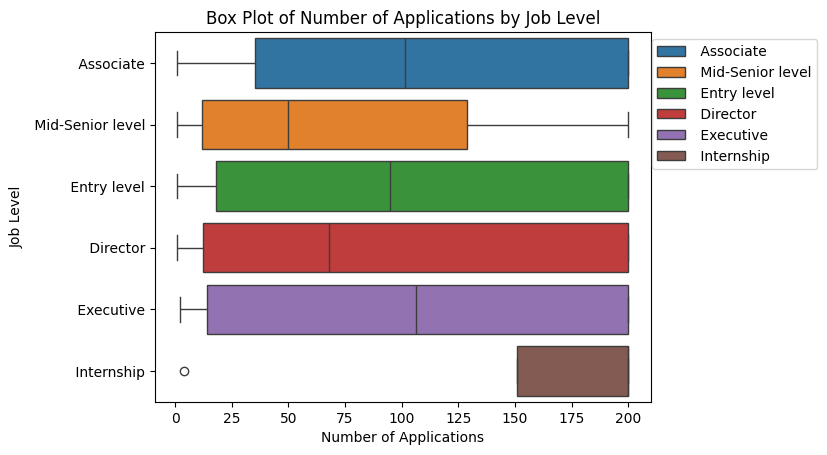

In [41]:
sns.boxplot(data=df, x=df["no_of_application"], y="job_level", hue="job_level").legend(loc='upper right', bbox_to_anchor=(1.35, 1))

plt.xlabel("Number of Applications")   # rename x axis label
plt.ylabel("Job Level")                # rename y axis label
plt.title("Box Plot of Number of Applications by Job Level")

plt.show()

In [42]:
# Calculate the mean and median of the job levels' applications.
df.groupby("job_level")["no_of_application"].agg([("Median", "median"), ("Mean", "mean"), \
                                                  ("Total applications", "sum"),("Total jobs Posted", "count")]).round(2)

,Median,Mean,Total applications,Total jobs Posted
job_level,,,,
Associate,101.5,109.27,37153.0,340
Director,68.0,89.73,1346.0,15
Entry level,95.0,102.17,10319.0,101
Executive,106.5,107.04,2783.0,26
Internship,200.0,151.00,604.0,4
Mid-Senior level,50.0,76.00,114909.0,1512


In [43]:
#Export cleaned CSV to be used for Tableau visualizations
df.to_csv('cleaned_linkedin_data', index = False)

## Data Visualization

### Link to view tableau dashboard with analysis would be included here ... 